In [1]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)
from razdel import tokenize
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

In [3]:
def create_dataframe(matrix, tokens):

    doc_names = [f'doc_{i}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [4]:
def Doc_func(text, segmenter=segmenter, morph_tagger=morph_tagger):
    doc_temp = Doc(text)
    doc_temp.segment(segmenter)
    doc_temp.tag_morph(morph_tagger)
    for token in doc_temp.tokens:
        token.lemmatize(morph_vocab)
    return ' '.join([
        #_.pos + "," +
        #_.text:
        _.lemma for _ in doc_temp.tokens if _.pos not in  ['PUNCT', 'ADP', 'CCONJ', 'PRON', 'SYM', 'SCONJ', 'DET', 'NUM']])

In [5]:
df = pd.read_excel("RPD_output/dataset.xlsx")

In [6]:
df['Doc'] = df['content'].apply(Doc_func)
df

,path_name,file_name,text_raw,title,content,Doc
0,C:\Users\seismopro\source\RPD_source\01_Форма_...,01_Форма_РП_дисциплины (1),МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Тестирование информационных систем,Основные виды учебной деятельности Разделы ди...,основной вид учебный деятельность раздел дисци...
1,C:\Users\seismopro\source\RPD_source\2023 РПД ...,2023 РПД Информационные технологии в цифровой ...,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Информационные технологии в цифровой среде,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
2,C:\Users\seismopro\source\RPD_source\ИСИС РПД.pdf,ИСИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Инструментальные средства информационных систем,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
3,C:\Users\seismopro\source\RPD_source\КИС РПД.pdf,КИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Корпоративные информационные системы и разрабо...,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
4,C:\Users\seismopro\source\RPD_source\Методы и ...,Методы и средства разработки информационных си...,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Методы и средства разработки информационных си...,Основные виды учебной деятельности Формируемый...,основной вид учебный деятельность формировать ...
5,C:\Users\seismopro\source\RPD_source\Построени...,Построение выводов по данным РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Анализ данных в управлении предприятием,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
6,C:\Users\seismopro\source\RPD_source\Проектиро...,Проектирование и разработка ИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Проектирование и разработка информационных систем,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
7,C:\Users\seismopro\source\RPD_source\Разработк...,Разработка Web-приложений РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Разработка Web-приложений,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
8,C:\Users\seismopro\source\RPD_source\РП МО.pdf,РП МО,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Машинное обучение,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
9,C:\Users\seismopro\source\RPD_source\РП_Интелл...,РП_Интеллект_сист_и_ техн_ 2021,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Интеллектуальные системы и технологии,(модуля) Разделы дисциплины Формируемый Виды ...,модуль раздел дисциплина формировать вид учебн...


In [7]:
df.to_excel(r'RPD_output/dataset_res.xlsx')
#ngram_range=(1, 2)

In [8]:
tfidf_vect = TfidfVectorizer()
tfidf_matrix = tfidf_vect.fit_transform(df['Doc'])
feature_names = tfidf_vect.get_feature_names_out()

list_output1 = []
for i in range(len(tfidf_matrix.toarray())):
    tfidf_scores = tfidf_matrix.toarray()[i]
    sorted_features = [list(filter(lambda c: c[0] > 0.02, sorted(zip(tfidf_scores, feature_names), reverse=True)))]
    list_output1.append(sorted_features)

In [9]:
 list_output1

[[[(0.7123051000391216, 'тестирование'),
   (0.3131286909278714, 'качество'),
   (0.2427340614416097, 'оценка'),
   (0.205066130394563, 'по'),
   (0.17338147245829263, 'стратегия'),
   (0.1471150465233071, 'требование'),
   (0.12952335830194292, 'регрессионный'),
   (0.12952335830194292, 'выявление'),
   (0.11715448097725788, 'удобство'),
   (0.11715448097725788, 'гостр'),
   (0.11693533446400077, 'раздел'),
   (0.09771832685461287, 'документирование'),
   (0.0938854470527703, 'формирование'),
   (0.0938854470527703, 'реализация'),
   (0.0938854470527703, 'обеспечение'),
   (0.08826902791398425, 'программный'),
   (0.08434033550744596, 'основа'),
   (0.0820264521578252, 'код'),
   (0.07828217273196784, 'рассматриваться'),
   (0.07828217273196784, 'проверка'),
   (0.07010110791673389, 'вид'),
   (0.06918221424828824, 'лабораторный'),
   (0.059700263801428136, 'лекция'),
   (0.05857724048862894, 'специализированный'),
   (0.05857724048862894, 'ретроспектива'),
   (0.05857724048862894, 'о

In [10]:
df.insert(6, "key_words", list_output1)

In [11]:
df

,path_name,file_name,text_raw,title,content,Doc,key_words
0,C:\Users\seismopro\source\RPD_source\01_Форма_...,01_Форма_РП_дисциплины (1),МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Тестирование информационных систем,Основные виды учебной деятельности Разделы ди...,основной вид учебный деятельность раздел дисци...,"[[(0.7123051000391216, тестирование), (0.31312..."
1,C:\Users\seismopro\source\RPD_source\2023 РПД ...,2023 РПД Информационные технологии в цифровой ...,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Информационные технологии в цифровой среде,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.4435061200375566, графика), (0.3167900857..."
2,C:\Users\seismopro\source\RPD_source\ИСИС РПД.pdf,ИСИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Инструментальные средства информационных систем,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.5049171995399959, иса), (0.25288410499165..."
3,C:\Users\seismopro\source\RPD_source\КИС РПД.pdf,КИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Корпоративные информационные системы и разрабо...,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.6164326599303754, киса), (0.3108961811159..."
4,C:\Users\seismopro\source\RPD_source\Методы и ...,Методы и средства разработки информационных си...,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Методы и средства разработки информационных си...,Основные виды учебной деятельности Формируемый...,основной вид учебный деятельность формировать ...,"[[(0.26375290422819037, проектирование), (0.23..."
5,C:\Users\seismopro\source\RPD_source\Построени...,Построение выводов по данным РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Анализ данных в управлении предприятием,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.365212955687669, предприятие), (0.2569413..."
6,C:\Users\seismopro\source\RPD_source\Проектиро...,Проектирование и разработка ИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Проектирование и разработка информационных систем,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.39160946233737115, проектирование), (0.28..."
7,C:\Users\seismopro\source\RPD_source\Разработк...,Разработка Web-приложений РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Разработка Web-приложений,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.7834617991754058, javascript), (0.3215589..."
8,C:\Users\seismopro\source\RPD_source\РП МО.pdf,РП МО,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Машинное обучение,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.5965895084953636, нейронный), (0.43972750..."
9,C:\Users\seismopro\source\RPD_source\РП_Интелл...,РП_Интеллект_сист_и_ техн_ 2021,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Интеллектуальные системы и технологии,(модуля) Разделы дисциплины Формируемый Виды ...,модуль раздел дисциплина формировать вид учебн...,"[[(0.41176812938608615, экспертный), (0.334015..."


In [13]:
df.to_excel(r'RPD_output/dataset_res2.xlsx')

# Косинусное расстояние

In [55]:
tfidf_vect2 = TfidfVectorizer()
tfidf_matrix2 = tfidf_vect2.fit_transform(df['Doc'])
feature_names2 = tfidf_vect2.get_feature_names_out()

list_output2 = []
for i in range(len(tfidf_matrix2.toarray())):
    tfidf_scores2 = tfidf_matrix2.toarray()[i]
    sorted_features2 = [feature for _, feature in list(filter(lambda c: c[0] > 0.1, sorted(zip(tfidf_scores2, feature_names2), reverse=True)))]
    list_output2.append(sorted_features2)

In [56]:
list_output3 = []
for elem in list_output2:
    list_output3.append(" ".join(elem))

In [57]:
tfidf_vect3 = TfidfVectorizer()
tfidf_matrix3 = tfidf_vect3.fit_transform(list_output3)
feature_names3 = tfidf_vect3.get_feature_names_out()

In [58]:
cosine_similarity_matrix  = cosine_similarity(tfidf_matrix3)
create_dataframe(tfidf_matrix3.toarray(), feature_names3)

,20,and,business,career,continuous,directum,educational,engineering,framework,html,...,эмп,эмпирический,эргономика,эргономический,этап,этика,это,эффективность,ядерный,язык
doc_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_2,0.000000,0.000000,0.281521,0.000000,0.000000,0.281521,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407646,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340017
doc_8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
doc_names_list = [f'doc_{i}' for i, _ in enumerate(cosine_similarity_matrix)]

In [60]:
dataframe_hm = create_dataframe(cosine_similarity_matrix, doc_names_list)

<Axes: >

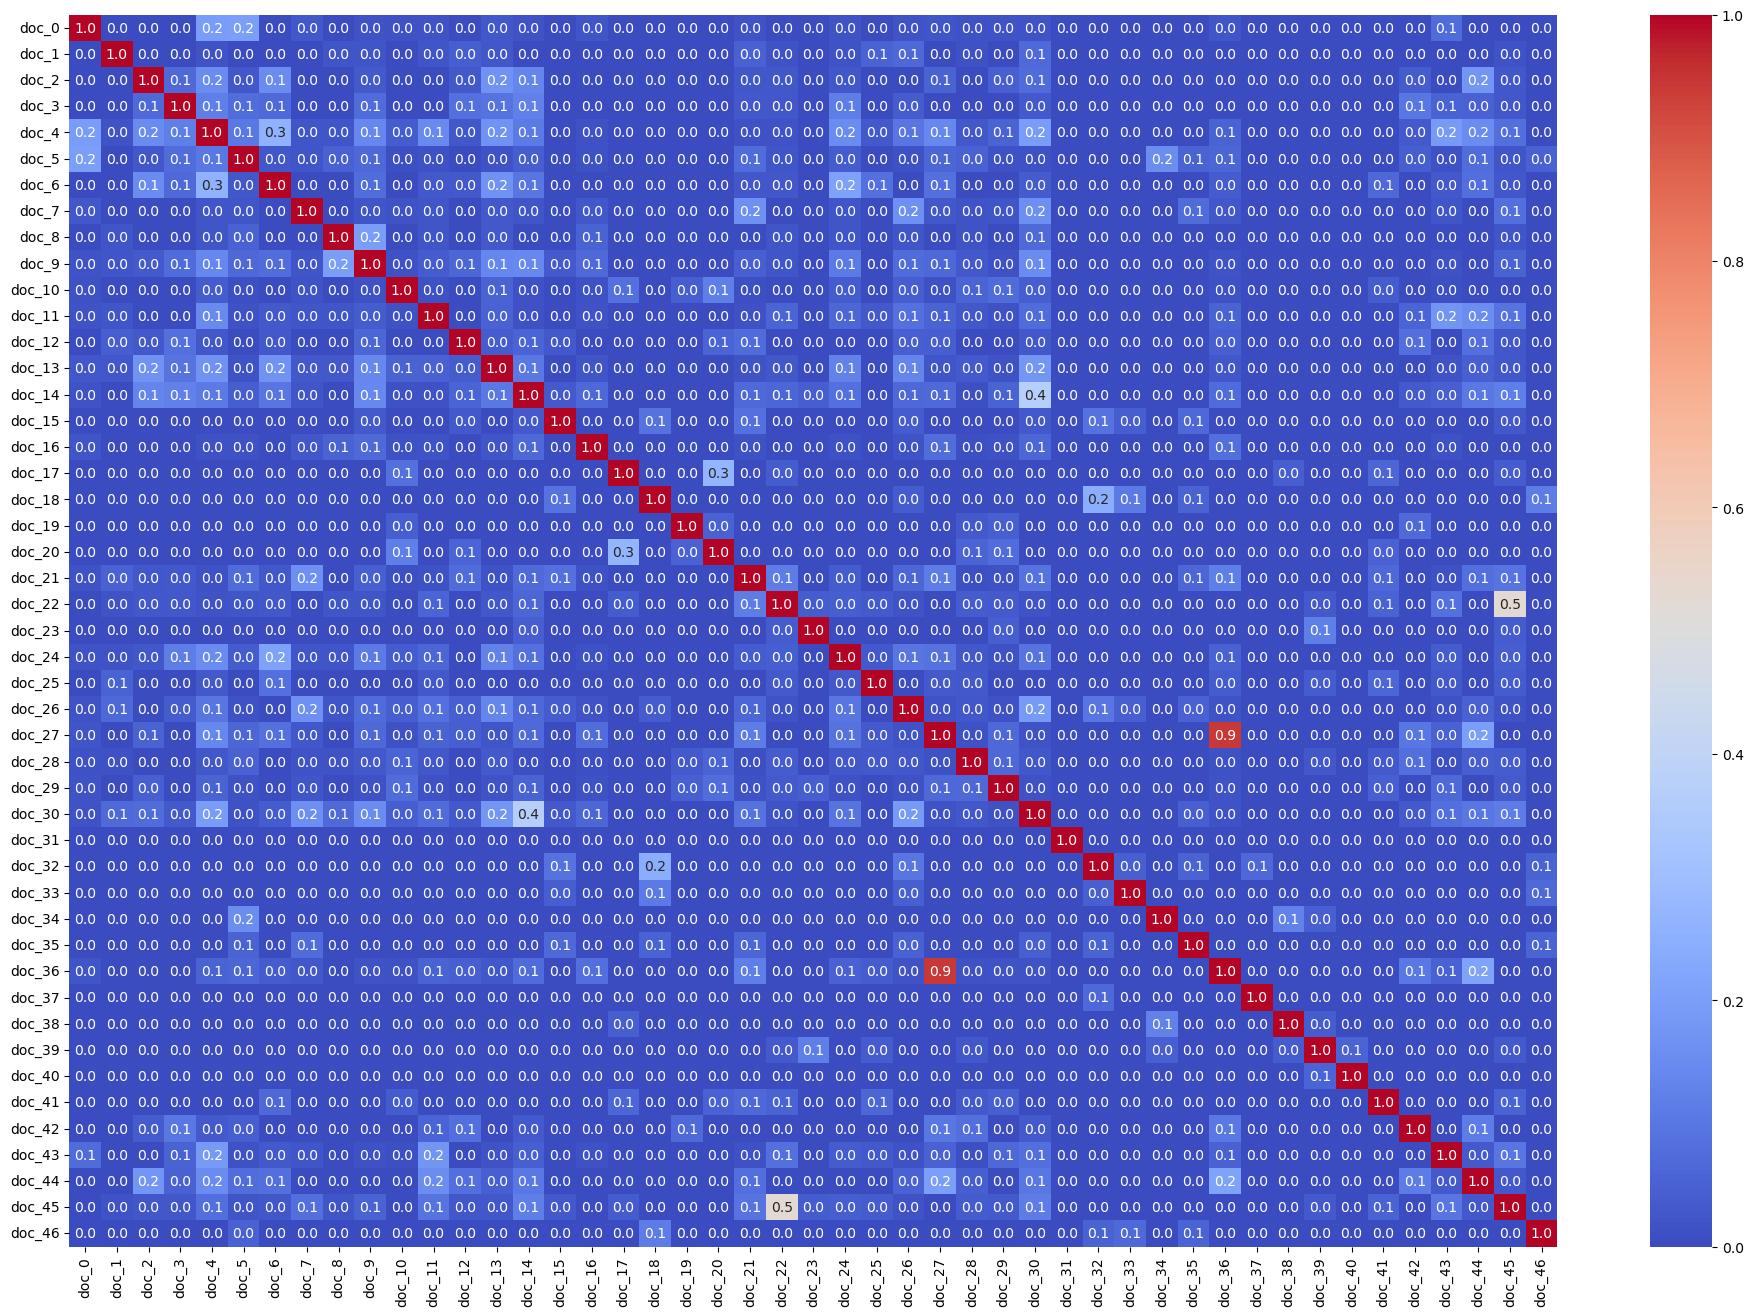

In [61]:
plt.figure(figsize = (24,16))
sns.heatmap(dataframe_hm, cmap="coolwarm", annot=True, fmt=".1f") 
#, annot= True,fmt=".1f"